<a href="https://colab.research.google.com/github/Paospina0718/Computacion2022/blob/main/Taller_6_computaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taller #6- Computación estadística

Paola Andrea Ospina Sanchez

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
##Creacion Data Frame con datos artificiales.
#Generar unos datos de la dostribución log-normal, con un promedio de daño del 8% y una desviación estandar de 3.6 (si algún valor es negativo se convierte a 0)
np.random.seed(6636)
mean, sigma = 1/8, 3.6
porc_enf = np.random.lognormal(mean,sigma,100)
porc_enf = pd.DataFrame(porc_enf,columns=['damg_perc'])

print("valores menores a cero", 
      porc_enf[porc_enf['damg_perc'] <0].count()) 

porc_enf.loc[porc_enf.damg_perc<0,"damg_perc"]=0

print("valores menores a cero", 
      porc_enf[porc_enf['damg_perc'] <0].count()) 

print(porc_enf)
print(porc_enf.min())
print(porc_enf.max())

valores menores a cero damg_perc    0
dtype: int64
valores menores a cero damg_perc    0
dtype: int64
    damg_perc
0    0.102654
1    1.220697
2    0.005159
3    0.693415
4    2.455813
..        ...
95   0.292382
96   0.114151
97   2.389938
98   0.104966
99   0.082820

[100 rows x 1 columns]
damg_perc    0.000033
dtype: float64
damg_perc    3586.842005
dtype: float64


In [5]:
#Extraer media, mediana, quartiles y percentiles (desde 5% hasta 95% cada 5)

media = porc_enf["damg_perc"].mean()
mediana = porc_enf["damg_perc"].median()

print(f"Mediana={mediana}")
print(f"Media={media}")

porc_enf_serie = pd.Series(porc_enf["damg_perc"])##convertir el DT en una serie.
print(porc_enf_serie.quantile([0.25, 0.75, 0.90, 0.95]))

arr_percnt=np.arange(0.05,0.95,0.05)#Crear un array determiando

print(porc_enf_serie.quantile(arr_percnt))

Mediana=1.2640932145337485
Media=63.46912929656273
0.25      0.140850
0.75     15.574698
0.90     68.678883
0.95    167.787562
Name: damg_perc, dtype: float64
0.05     0.004949
0.10     0.017732
0.15     0.070964
0.20     0.101248
0.25     0.140850
0.30     0.195990
0.35     0.394911
0.40     0.635765
0.45     0.782018
0.50     1.264093
0.55     2.536616
0.60     4.518623
0.65     7.355047
0.70     9.869800
0.75    15.574698
0.80    19.288207
0.85    26.964367
0.90    68.678883
Name: damg_perc, dtype: float64


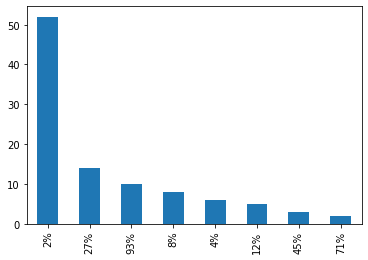

In [6]:
#Categorizar la variable según la escala diagramtica del articulo referencia
cat_enf = []
for pe_i in porc_enf['damg_perc']:
  if(pe_i <= 2):
    cat_enf.append('2%')
  elif(pe_i <= 4):
    cat_enf.append('4%')
  elif(pe_i <= 8):
    cat_enf.append('8%')
  elif(pe_i <= 12):
    cat_enf.append('12%')
  elif(pe_i <= 27):
    cat_enf.append('27%')
  elif(pe_i <= 45):
    cat_enf.append('45%')
  elif(pe_i <= 71):
    cat_enf.append('71%')
  else:
    cat_enf.append('93%')

cat_enf_serie = pd.Series(cat_enf)
cat_enf_serie.value_counts().plot(kind='bar')

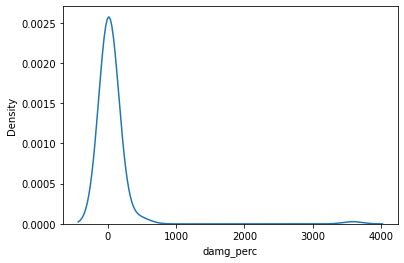

In [11]:
sns.kdeplot(porc_enf["damg_perc"])